In [118]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
import math

In [109]:
df=pd.read_csv('production-data.csv', sep=',')

In [115]:
comp_def=np.zeros((2,6))
comp_prod=np.zeros((2,6))

for i in range(df.shape[0]):
    if df.iloc[i][5]=='harpy.co':
        comp_def[0][df.iloc[i][2]-df.iloc[i][1]-1]+=df.iloc[i][4]
        for j in range(6-int(df.iloc[i][1]),-1,-1):
            comp_prod[0][j]+=df.iloc[i][3]
    if df.iloc[i][5]=='westeros.inc':
        comp_def[1][df.iloc[i][2]-df.iloc[i][1]-1]+=df.iloc[i][4]
        for j in range(6-int(df.iloc[i][1]),-1,-1):
            comp_prod[1][j]+=df.iloc[i][3]
for i in range(6):
    comp_def[0][i]/=comp_prod[0][i]
    comp_def[1][i]/=comp_prod[1][i]
print(comp_def)

[[ 0.02476849  0.02557856  0.0246802   0.14485299  0.12281036  0.1023247 ]
 [ 0.08483794  0.07818774  0.0712089   0.0673817   0.06321077  0.0532197 ]]


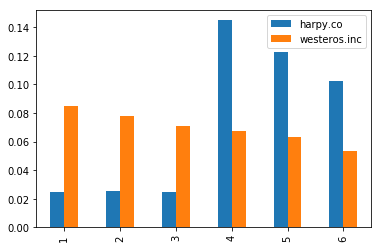

In [116]:
comp_def1=np.zeros((2,6))
comp_def1=comp_def.transpose()
df2=DataFrame(comp_def1, index=['1', '2','3','4','5','6'],columns=['harpy.co','westeros.inc']);
df2.plot(kind='bar');
plt.savefig('1.png')
plt.show()

In [126]:
comp_def_norm=comp_def
norm0=0
norm1=0
for i in range(6):
    norm0+=pow(comp_def[0][i],2)
    norm1+=pow(comp_def[1][i],2)
norm0=math.sqrt(norm0)
norm1=math.sqrt(norm1)
comp_def_norm[0]/=norm0
comp_def_norm[1]/=norm1
print(comp_def_norm)

[[ 0.11257012  0.11625182  0.11216888  0.65834128  0.55815989  0.46505475]
 [ 0.491868    0.45331188  0.41285037  0.39066132  0.36647933  0.30855375]]


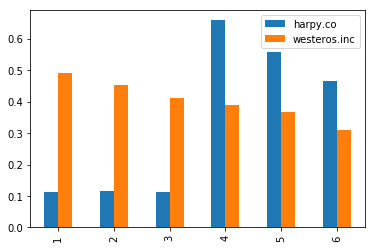

In [127]:
comp_def_norm=comp_def_norm.transpose()
df2=DataFrame(comp_def_norm, index=['1', '2','3','4','5','6'],columns=['harpy.co','westeros.inc']);
df2.plot(kind='bar');
plt.savefig('2.png')
plt.show()